# Project:- IPL Data Analysis(2008-2024)

# Description:-  
### The goal of this project is to analyze the Indian Premier League(IPL) and Deliveries dataset to uncover insights into various   aspects of the tournament.This includes examining player performances, team statistics, match outcomes, and delivery details to identify patterns, trends, and key factors that influence match results.

# Libraries Used:- Numpy , Pandas , Matplotlib , Seaborn.

# By- Ashish Verma

# ________________________________________________________________

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# IPL Datasets
## Dataset Overview:  
### 1.IPL Dataset: Contains information on matches, teams, venues, and seasons.
### 2.Deliveries Dataset: Contains detailed delivery data, including ball-by-ball outcomes, bowler and batsman statistics, and match events.
### 3.Batsman run Dataset: Contains runs of every batsman of each matches.
### 4.Kohli ipl dataset: Contain virat kohli all matches data. 

In [2]:
import warnings
warnings.filterwarnings('ignore')

vk = pd.read_csv('kohli_ipl.csv',index_col='match_no',squeeze=True)
ipl = pd.read_csv("ipl_matches.csv")
br = pd.read_csv("batsman_runs.csv")
d = pd.read_csv("deliveries.csv")

# 1. No of match Played by virat kohli

In [3]:
vk.count()

244

# 2. No of  100's scored by kohli

In [4]:
print(vk[(vk >= 100)])
print(vk[(vk >= 100)].size)

match_no
120    100
123    108
126    109
128    113
164    100
228    100
229    101
234    113
Name: batsman_runs, dtype: int64
8


# 3. No of  50's scored by kohli

In [5]:
vk[(vk >= 50) & (vk <=99)].size

56

# 4. Highest IPL score by virat kohli

In [6]:
vk.max()

113

# 5. Find number of ducks by virat kohli

In [7]:
vk[vk == 0].size

10

#  6. Virat kohli runs between 51 - 99.

In [8]:
vk[vk.between(51,99)].size

53

# 7. How many time virat kohli out on 99.

In [9]:
vk[(vk == 99)].size

1

#  8. Find MS Dhoni record against all teams

In [10]:
tf1 = d[d['batter'] == 'MS Dhoni']
tf1.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).reset_index()

,bowling_team,batsman_runs
0,Royal Challengers Bangalore,839
1,Mumbai Indians,768
2,Kings XI Punjab,595
3,Kolkata Knight Riders,556
4,Rajasthan Royals,553
5,Sunrisers Hyderabad,494
6,Delhi Daredevils,487
7,Deccan Chargers,281
8,Delhi Capitals,222
9,Pune Warriors,135


# 9. How many super over happen till 2024

In [11]:
ipl[ipl['super_over'] == 'Y']['super_over'].shape[0]

14

# 10. How many matches has csk won in kolkata

In [12]:
m = ipl[ipl['city'] == 'Kolkata']
m[m['winner'] == 'Chennai Super Kings']['winner'].size

6

# 11. Which player won player of the match how many times

In [13]:
ipl['player_of_match'].value_counts().head(10)

AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
Name: player_of_match, dtype: int64

# 12. Find which player has won most player of the match -> in finals and qualifiers

In [14]:
ipl[ipl['match_type'] != 'League']['player_of_match'].value_counts()

SK Raina             3
F du Plessis         3
KA Pollard           3
SR Watson            2
JJ Bumrah            2
M Vijay              2
AB de Villiers       2
RD Gaikwad           2
MA Starc             2
A Kumble             2
MK Pandey            2
YK Pathan            2
RR Pant              1
Rashid Khan          1
KS Williamson        1
MP Stoinis           1
TA Boult             1
SA Yadav             1
JC Buttler           1
SP Narine            1
VR Iyer              1
DA Miller            1
RM Patidar           1
HH Pandya            1
Akash Madhwal        1
Shubman Gill         1
DP Conway            1
R Ashwin             1
AD Russell           1
Washington Sundar    1
KH Pandya            1
Harbhajan Singh      1
AC Gilchrist         1
DE Bollinger         1
MM Patel             1
CH Gayle             1
MS Dhoni             1
MS Bisla             1
MEK Hussey           1
BJ Hodge             1
UT Yadav             1
KV Sharma            1
V Sehwag             1
A Nehra    

# 13. How many matches each team has played

In [15]:
(ipl['team1'].value_counts() + ipl['team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 261
Kolkata Knight Riders          251
Royal Challengers Bangalore    240
Chennai Super Kings            238
Rajasthan Royals               221
Kings XI Punjab                190
Sunrisers Hyderabad            182
Delhi Daredevils               161
Delhi Capitals                  91
Deccan Chargers                 75
Punjab Kings                    56
Pune Warriors                   46
Gujarat Titans                  45
Lucknow Super Giants            44
Gujarat Lions                   30
Rising Pune Supergiant          16
Royal Challengers Bengaluru     15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

# 14. Number of matches won by each team.

In [16]:
ipl['winner'].value_counts()

Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

# 15. Find all the IPL final winners

In [17]:
ipl[ipl['match_type'] == 'Final'][['season','winner']]

,season,winner
57,2007/08,Rajasthan Royals
114,2009,Deccan Chargers
174,2009/10,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad
635,2017,Mumbai Indians


# 16. Winning Team of every match

In [18]:
ipl[['team1','team2','winner']].head(5)

,team1,team2,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
3,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders


# 17. Toss decision plot

<Axes: ylabel='toss_decision'>

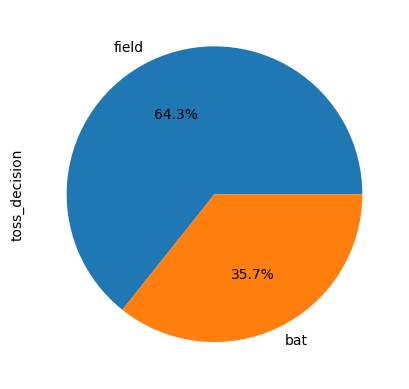

In [19]:
ipl['toss_decision'].value_counts().plot(kind='pie',autopct='%.1f%%')

# 18. Toss winner is match winner in percentage

In [20]:
(ipl[ipl['toss_winner'] == ipl['winner']].shape[0]/ipl.shape[0])*100

50.593607305936075

# 19. Find the top 10 batsman in terms of runs

In [21]:
d.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

# 20. Find Top 5 batsman with maximum no of sixes

In [22]:
six = d[d['batsman_runs'] == 6]
six.groupby('batter')['batter'].count().sort_values(ascending=False).head(10)

batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
Name: batter, dtype: int64

# 21. Find Top 5 batsman with maximum no of Fours

In [23]:
six = d[d['batsman_runs'] == 4]
six.groupby('batter')['batter'].count().sort_values(ascending=False).head(10)

batter
S Dhawan        768
V Kohli         708
DA Warner       663
RG Sharma       599
SK Raina        506
G Gambhir       492
RV Uthappa      481
AM Rahane       479
KD Karthik      466
F du Plessis    422
Name: batter, dtype: int64

# 22. Find batsman with most number of 4's and 6's in last 5 overs

In [24]:
tf = d[d['over'] > 15]
tf = tf[(tf['batsman_runs'] == 4) | (tf['batsman_runs'] == 4)]
tf.groupby('batter')['batter'].count().sort_values(ascending=False).head(10)

batter
MS Dhoni          211
KD Karthik        142
KA Pollard        110
AB de Villiers    106
RA Jadeja         104
RG Sharma          94
V Kohli            78
AD Russell         78
HH Pandya          76
YK Pathan          76
Name: batter, dtype: int64

# 23. Find batsman with most number of 6's in last 5 overs

In [25]:
tf = d[d['over'] > 15]
tf = tf[tf['batsman_runs'] == 6]
tf.groupby('batter')['batter'].count().sort_values(ascending=False).head(10)

batter
MS Dhoni          175
KA Pollard        127
AB de Villiers    112
AD Russell         93
KD Karthik         91
HH Pandya          82
RG Sharma          79
V Kohli            71
RA Jadeja          69
DA Miller          60
Name: batter, dtype: int64

# 24. Top 10 Wicket taker in ipl

In [26]:
wicket = d[d['dismissal_kind'] != 'run out']
wicket = wicket.groupby('bowler')['player_dismissed'].count().reset_index()
wicket = wicket.sort_values('player_dismissed', ascending=False).head(10)
wicket

,bowler,player_dismissed
524,YS Chahal,205
348,PP Chawla,192
119,DJ Bravo,183
355,R Ashwin,181
71,B Kumar,181
446,SP Narine,180
8,A Mishra,174
438,SL Malinga,170
193,JJ Bumrah,168
373,RA Jadeja,160


# 25. Most frequent fielders in IPL

In [27]:
fielder = d['fielder'].value_counts().head(10)
fielder

MS Dhoni          220
KD Karthik        199
AB de Villiers    141
RV Uthappa        133
WP Saha           131
V Kohli           131
SK Raina          119
RA Jadeja         116
SV Samson         115
RG Sharma         111
Name: fielder, dtype: int64


# 26. Create a function that can return the highest score of any batsman

In [28]:
def highest(batsman):
  temp_df = d[d['batter'] == batsman]
  return temp_df.groupby('match_id')['batsman_runs'].sum().sort_values(ascending=False).head(1).values[0]


highest('MS Dhoni')

84

# 27. Highest runs in every season

In [29]:
temp_df = d.merge(ipl,left_on='match_id',right_on='id')
temp_df.groupby(['season','batter'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batter,batsman_runs
115,2007/08,SE Marsh,616
229,2009,ML Hayden,572
446,2009/10,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


# 28. Which bowler has taken the most wickets in powerplays (first 6 overs)?

In [30]:
p = d[(d['over'] <= 6)]
pw = p[p['dismissal_kind'] != 'run out']
pw.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)

bowler
B Kumar           72
Sandeep Sharma    62
TA Boult          62
UT Yadav          60
DL Chahar         59
I Sharma          59
Z Khan            54
R Ashwin          51
Mohammed Shami    46
P Kumar           44
Name: dismissal_kind, dtype: int64

# 29. Determine the bowler with the best bowling figures (most wickets in a single match) in the IPL dataset.

In [31]:
ipl[ipl['result'] == 'wickets']['player_of_match'].mode()

0    YK Pathan
Name: player_of_match, dtype: object

# 30. Who has the best bowling figures (most wickets in a single match) in IPL history?

In [32]:
bowl = d.groupby(['match_id', 'bowler'])['player_dismissed'].count().reset_index()
bowl.sort_values(by='player_dismissed', ascending=False).head(10)

,match_id,bowler,player_dismissed
9668,1254058,HV Patel,6
290,336005,Sohail Tanvir,6
11969,1359536,B Kumar,6
8499,1178394,AS Joseph,6
12086,1370351,Akash Madhwal,6
4546,598056,DJG Sammy,6
6609,980979,A Zampa,6
6510,980963,AD Russell,6
2392,501221,Harbhajan Singh,5
784,392190,Kamran Khan,5


# 31. Avg sixes in Stadium

In [33]:
temp_df = d.merge(ipl,left_on='match_id',right_on='id')
six_df = temp_df[temp_df['batsman_runs'] == 6]
num_sixes = six_df.groupby('venue')['venue'].count()

num_matches = ipl['venue'].value_counts()
(num_sixes/num_matches).sort_values(ascending=False).head(10)

Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam    22.500000
M Chinnaswamy Stadium, Bengaluru                                      20.357143
Eden Gardens, Kolkata                                                 20.125000
Himachal Pradesh Cricket Association Stadium, Dharamsala              18.750000
Arun Jaitley Stadium, Delhi                                           18.687500
Holkar Cricket Stadium                                                17.222222
M.Chinnaswamy Stadium                                                 17.066667
Rajiv Gandhi International Stadium, Uppal, Hyderabad                  16.692308
Wankhede Stadium, Mumbai                                              15.800000
Narendra Modi Stadium, Ahmedabad                                      15.666667
Name: venue, dtype: float64

# 32. Count the number of matches played at each venue/stadium

In [34]:
ipl['venue'].value_counts()

Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narendra Mod

# 33. Cities where the most matches have been played


In [35]:
ipl['city'].value_counts()

Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Guwahati            3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

# 34. Most common dismissal types in IPL matches

In [36]:
d['dismissal_kind'].value_counts()

caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: dismissal_kind, dtype: int64

# 35. Most common method of dismissal for MS Dhoni

In [37]:
d[d['batter'] == 'MS Dhoni']['dismissal_kind'].value_counts()

caught               92
run out              25
bowled               20
lbw                   5
caught and bowled     4
stumped               3
Name: dismissal_kind, dtype: int64

# 36. Highest winning margin

In [38]:
ipl[ipl['result_margin'] == ipl['result_margin'].max()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
620,1082635,2017,Delhi,2017-05-06,League,LMP Simmons,Feroz Shah Kotla,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,213.0,20.0,N,NaN,Nitin Menon,CK Nandan


#  37. Bar chart of the number of matches won by each team.

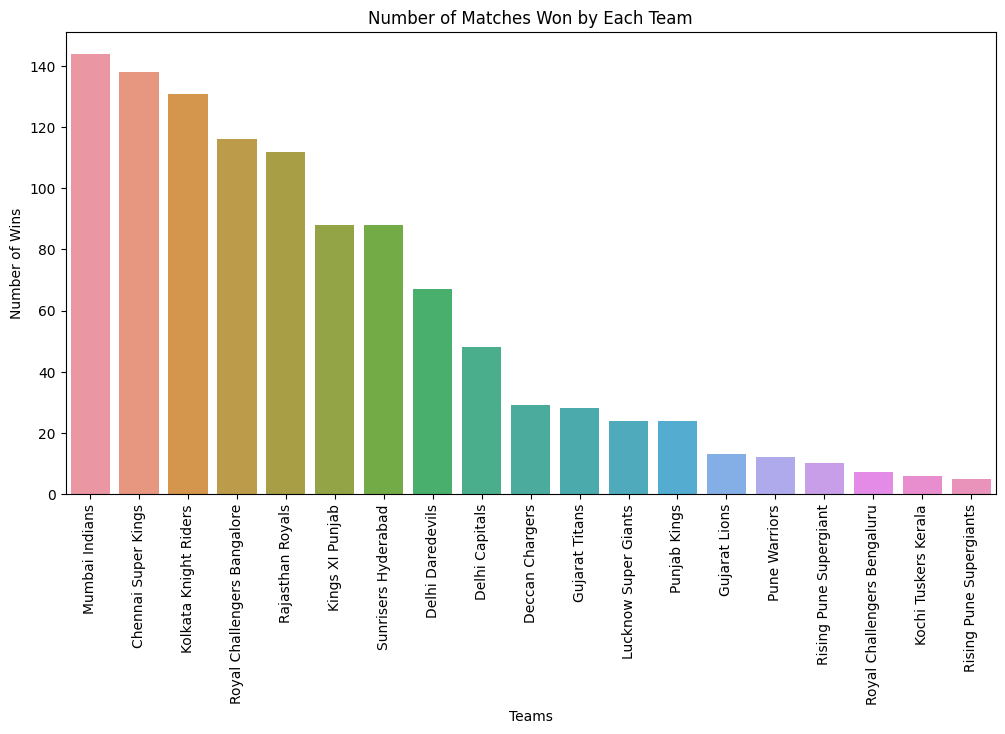

In [39]:
team_win_counts = ipl['winner'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=team_win_counts.index, y=team_win_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Number of Matches Won by Each Team')
plt.show()

# 38. Bar chart of number of matches played in each season.

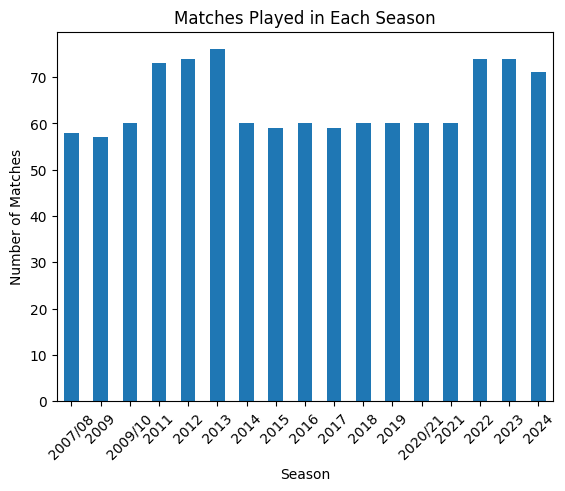

In [40]:
season_counts = ipl['season'].value_counts().sort_index()
season_counts.plot(kind='bar', xlabel='Season', ylabel='Number of Matches', title='Matches Played in Each Season')
plt.xticks(rotation=45)
plt.show()

# 39. Calculate the percentage of matches won by each team in a specific season like 2021.

In [41]:
ipl[ipl['season'] == '2021']['winner'].value_counts() / ipl[ipl['season'] == '2021']['winner'].count() * 100

Chennai Super Kings            18.333333
Delhi Capitals                 16.666667
Royal Challengers Bangalore    15.000000
Kolkata Knight Riders          15.000000
Mumbai Indians                 11.666667
Punjab Kings                   10.000000
Rajasthan Royals                8.333333
Sunrisers Hyderabad             5.000000
Name: winner, dtype: float64

# 40. Highest score of every batsman

In [42]:
batsmen_list = d['batter'].unique()
batsmen_high_scores = []

for batsman in batsmen_list:
    temp_df = d[d['batter'] == batsman]

    runs_per_match = temp_df.groupby('match_id')['batsman_runs'].sum()
    runs_per_match_sorted = runs_per_match.sort_values(ascending=False)
    highest_score = runs_per_match_sorted.iloc[0]
    batsmen_high_scores.append((batsman, highest_score))
    
sorted_batsmen_high_scores = sorted(batsmen_high_scores, key=lambda x: x[1], reverse=True)

for batsman, highest_score in sorted_batsmen_high_scores:
    print(f"{batsman} ,Highest Score: {highest_score}")

CH Gayle ,Highest Score: 175
BB McCullum ,Highest Score: 158
Q de Kock ,Highest Score: 140
AB de Villiers ,Highest Score: 133
KL Rahul ,Highest Score: 132
Shubman Gill ,Highest Score: 129
RR Pant ,Highest Score: 128
M Vijay ,Highest Score: 127
DA Warner ,Highest Score: 126
JC Buttler ,Highest Score: 124
MP Stoinis ,Highest Score: 124
YBK Jaiswal ,Highest Score: 124
V Sehwag ,Highest Score: 122
PC Valthaty ,Highest Score: 120
SV Samson ,Highest Score: 119
SR Watson ,Highest Score: 117
A Symonds ,Highest Score: 117
MEK Hussey ,Highest Score: 116
WP Saha ,Highest Score: 115
SE Marsh ,Highest Score: 115
ST Jayasuriya ,Highest Score: 114
MK Pandey ,Highest Score: 114
JM Bairstow ,Highest Score: 114
V Kohli ,Highest Score: 113
RM Patidar ,Highest Score: 112
DPMD Jayawardene ,Highest Score: 110
AC Gilchrist ,Highest Score: 109
RG Sharma ,Highest Score: 109
SP Narine ,Highest Score: 109
RD Gaikwad ,Highest Score: 108
BA Stokes ,Highest Score: 107
S Dhawan ,Highest Score: 106
MA Agarwal ,Highes

# 41. Centuries scored by every batsman


In [43]:
unique_batsmen = d['batter'].unique()

batsman_runs_df = pd.DataFrame(columns=['Batsman', 'Match_ID', 'Total_Runs'])

for batsman_name in unique_batsmen:
    temp_df = d[d['batter'] == batsman_name]
    batsman_runs = temp_df.groupby('match_id')['batsman_runs'].sum().reset_index()
    batsman_runs.columns = ['Match_ID', 'Total_Runs']
    batsman_runs['Batsman'] = batsman_name
    batsman_runs = batsman_runs[batsman_runs['Total_Runs'] >= 100]
    batsman_runs_df = pd.concat([batsman_runs_df, batsman_runs])
    
batsman_runs_df.reset_index(drop=True, inplace=True)
batsman_runs_df.groupby('Batsman')['Total_Runs'].count().sort_values(ascending=False)

Batsman
V Kohli             8
JC Buttler          7
CH Gayle            6
SR Watson           4
KL Rahul            4
DA Warner           4
Shubman Gill        4
AB de Villiers      3
SV Samson           3
HM Amla             2
RG Sharma           2
RD Gaikwad          2
Q de Kock           2
M Vijay             2
JM Bairstow         2
S Dhawan            2
SA Yadav            2
AC Gilchrist        2
AM Rahane           2
BB McCullum         2
BA Stokes           2
YBK Jaiswal         2
V Sehwag            2
TM Head             1
SP Narine           1
SE Marsh            1
SK Raina            1
SPD Smith           1
WP Saha             1
SR Tendulkar        1
ST Jayasuriya       1
WG Jacks            1
VR Iyer             1
A Symonds           1
MP Stoinis          1
RR Pant             1
RM Patidar          1
AT Rayudu           1
B Sai Sudharsan     1
C Green             1
D Padikkal          1
DA Miller           1
DPMD Jayawardene    1
H Klaasen           1
HC Brook            1
KP

#  42. Batsman with number of Ducks (out on the score of 0)

In [44]:
unique_batsmen = d['batter'].unique()
batsman_runs_df = pd.DataFrame(columns=['Batsman', 'Match_ID', 'Total_Runs'])

for batsman_name in unique_batsmen:
    temp_df = d[d['batter'] == batsman_name]
    
    batsman_runs = temp_df.groupby('match_id')['batsman_runs'].sum().reset_index()
    batsman_runs.columns = ['Match_ID', 'Total_Runs']
    batsman_runs['Batsman'] = batsman_name
    batsman_runs = batsman_runs[batsman_runs['Total_Runs'] == 0]
    batsman_runs_df = pd.concat([batsman_runs_df, batsman_runs])
    
batsman_runs_df.reset_index(drop=True, inplace=True)
batsman_runs_df.groupby('Batsman')['Total_Runs'].count().sort_values(ascending=False)

Batsman
KD Karthik       19
GJ Maxwell       18
SP Narine        17
Rashid Khan      16
RG Sharma        16
                 ..
I Udana           1
R Shepherd        1
R Tewatia         1
Harpreet Brar     1
M Theekshana      1
Name: Total_Runs, Length: 450, dtype: int64

# 43. To determine which team has won the most IPL championships:

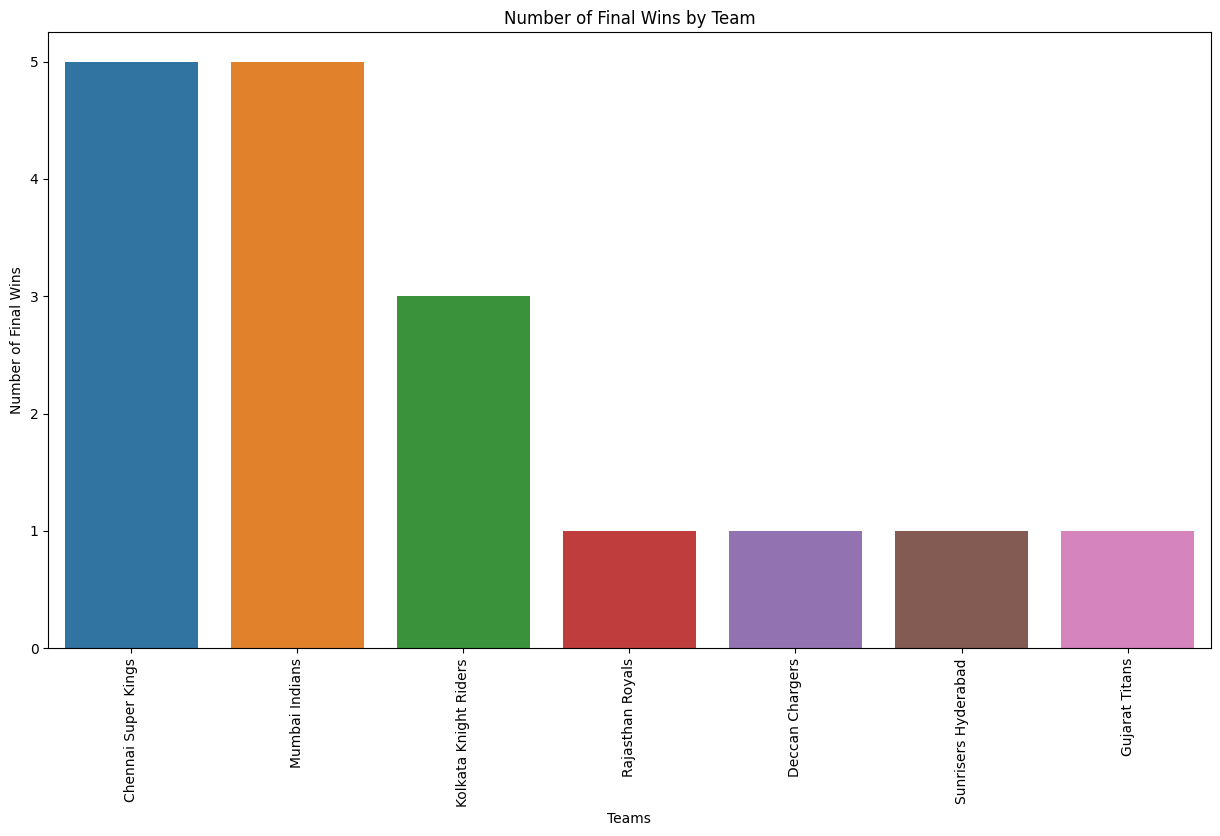

In [45]:
f = ipl[ipl['match_type'] == 'Final']
fw = f['winner'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(x=fw.index, y=fw.values)
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Number of Final Wins')
plt.title('Number of Final Wins by Team')
plt.show()

# 44. Which team has played the maximum number of IPL finals

In [46]:
import warnings
warnings.filterwarnings('ignore')

final_teams = ipl[ipl['match_type'] == 'Final']
final_teams['team1'].append(final_teams['team2']).value_counts().head(1)

Chennai Super Kings    10
dtype: int64

# 45. How many teams have played in the IPL

In [47]:
unique_teams = pd.concat([ipl['team1'], ipl['team2']]).unique()
print(unique_teams)
len(unique_teams)

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']


19

# 46. Top 10 batsman with highest strike rate in ipl till 2024.

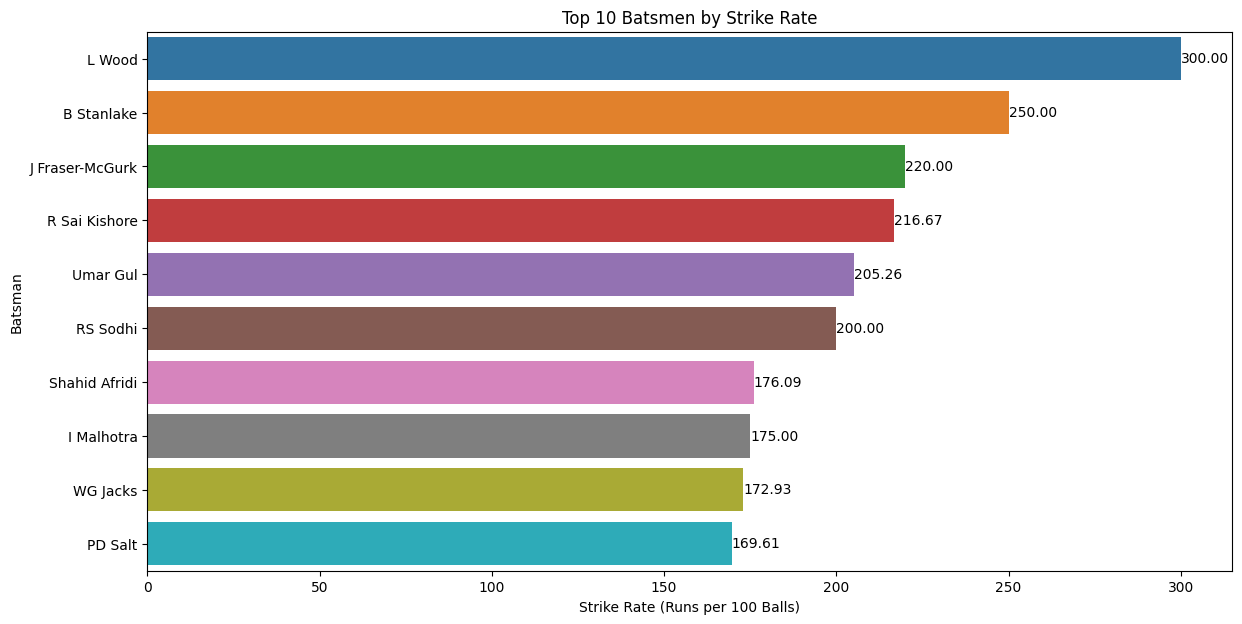

In [48]:
runs_scored = d.groupby('batter')['batsman_runs'].sum().reset_index()
balls_faced = d.groupby('batter').size().reset_index(name='balls_faced')

batsman_stats = runs_scored.merge(balls_faced, on='batter')

# Calculate strike rate (runs scored per 100 balls faced)
batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['balls_faced']) * 100

top_batsmen = batsman_stats.sort_values(by='strike_rate', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='strike_rate', y='batter', data=top_batsmen)

for index, value in enumerate(top_batsmen['strike_rate']):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

plt.title('Top 10 Batsmen by Strike Rate')
plt.xlabel('Strike Rate (Runs per 100 Balls)')
plt.ylabel('Batsman')
plt.show()

# 47. Plot a Grid in matplotlib to show each bowl where a batsman hit six.

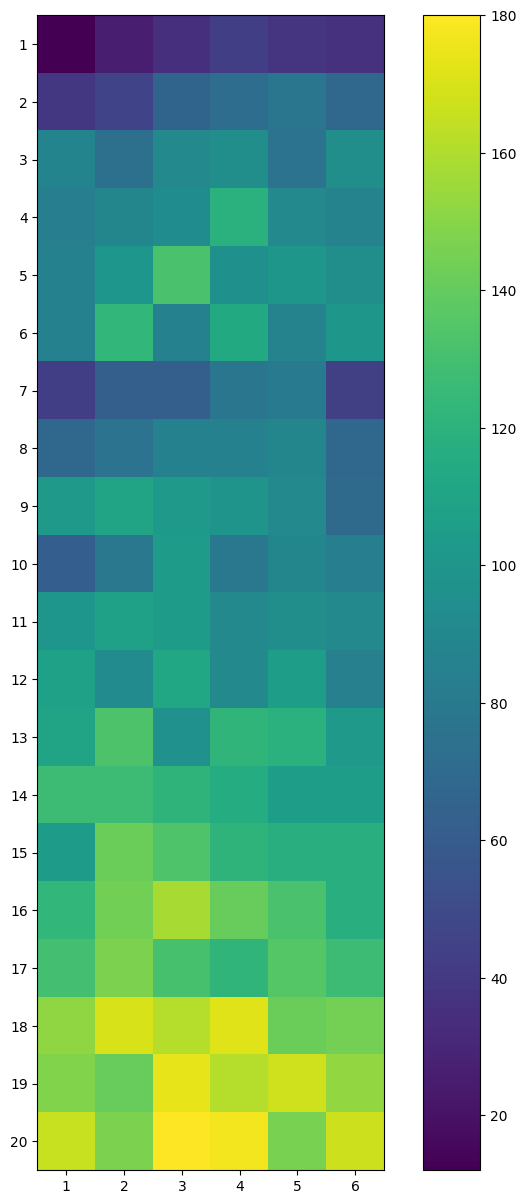

In [49]:
temp_df = d[(d['ball'].isin([1,2,3,4,5,6])) & (d['batsman_runs']==6)]
grid = temp_df.pivot_table(index='over',columns='ball',values='batsman_runs',aggfunc='count')

plt.figure(figsize=(10,15))
plt.imshow(grid)
plt.yticks(d['over'].unique(), list(range(1,21)))
plt.xticks(np.arange(0,6), list(range(1,7)))
plt.colorbar()

# 48. Find winning percentage of every team in ipl.

In [50]:
matches = (ipl['team1'].value_counts() + ipl['team2'].value_counts()).sort_values(ascending=False)
winner = ipl['winner'].value_counts()

win_percentage = (winner/matches)*100
win_percentage.sort_values(ascending=False)

Rising Pune Supergiant         62.500000
Gujarat Titans                 62.222222
Chennai Super Kings            57.983193
Mumbai Indians                 55.172414
Lucknow Super Giants           54.545455
Delhi Capitals                 52.747253
Kolkata Knight Riders          52.191235
Rajasthan Royals               50.678733
Sunrisers Hyderabad            48.351648
Royal Challengers Bangalore    48.333333
Royal Challengers Bengaluru    46.666667
Kings XI Punjab                46.315789
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Punjab Kings                   42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
dtype: float64

# 49.Plot a seaborn grid that show runs scored in each over for match id.

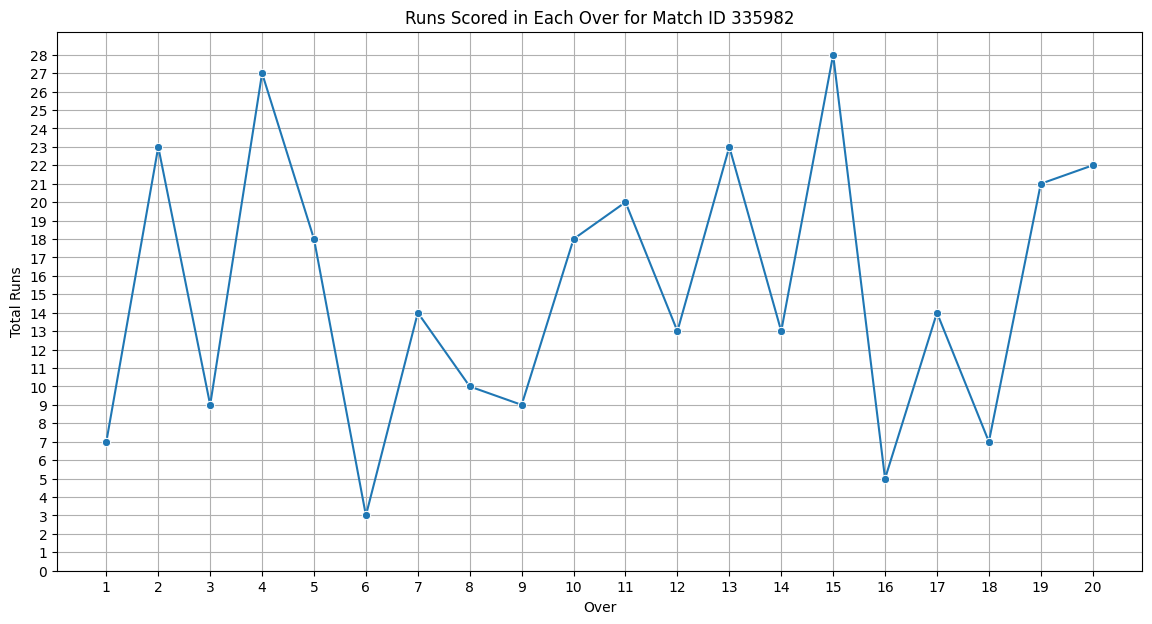

In [51]:
match_id = 335982  # Replace with your match ID

match_data = d[d['match_id'] == match_id]
match_data['over'] = match_data['over'] + 1

runs_per_over = match_data.groupby('over')['total_runs'].sum().reset_index()

all_overs = pd.DataFrame({'over': range(1, 21)})
runs_per_over = all_overs.merge(runs_per_over, on='over', how='left').fillna(0)

plt.figure(figsize=(14, 7))
sns.lineplot(x='over', y='total_runs', data=runs_per_over, marker='o')
plt.title(f'Runs Scored in Each Over for Match ID {match_id}')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.xticks(range(1, 21))
max_runs = int(runs_per_over['total_runs'].max())
plt.yticks(range(0, max_runs + 1, 1))
plt.grid(True)
plt.show()

# 50. Team1 VS Team2

In [54]:
import warnings
warnings.filterwarnings('ignore')
def h2h(t1, t2):
    mask = ipl[(ipl['team1'] == t1) & (ipl['team2'] == t2) | (ipl['team1'] == t2) & (ipl['team2'] == t1)]
    w1 = mask[ipl['winner'] == t1].shape[0]
    w2 = mask[ipl['winner'] == t2].shape[0]
    print("Matches Played: ", mask.shape[0])
    return "{} : {} Vs {} : {}".format(t1,w1,t2,w2) 

t1 = input("Enter Team 1: ")
t2 = input("Enter Team 2: ")
h2h(t1,t2)

Enter Team 1: Chennai Super Kings
Enter Team 2: Mumbai Indians
Matches Played:  37


'Chennai Super Kings : 17 Vs Mumbai Indians : 20'